# Datasets preparation

In [24]:
import pandas as pd

## [BBC News Archive](https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive)

In [25]:
bbcnd_data = pd.read_csv("data/bbc-news-data.csv", delimiter="\t")
bbcnd_data.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [26]:
bbcnd_data.drop(columns=["filename"], inplace=True)
bbcnd_data.insert(0, "source", "BBC News")

In [27]:
bbcnd_data.describe()

,source,category,title,content
count,2225,2225,2225,2225
unique,1,5,2096,2092
top,BBC News,sport,Microsoft seeking spyware trojan,Microsoft has warned PC users to update their...
freq,2225,511,2,2


In [28]:
bbcnd_data.groupby("category").count()

,source,title,content
category,,,
business,510,510,510
entertainment,386,386,386
politics,417,417,417
sport,511,511,511
tech,401,401,401


## [Internet news data with readers engagement](https://www.kaggle.com/datasets/szymonjanowski/internet-articles-data-with-users-engagement)

In [29]:
indwre_data = pd.read_csv("data/internet-news-data-with-readers-engagement.csv", index_col=0)
indwre_data.head()

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


In [30]:
indwre_data.drop(columns=[
    "source_id", "author",
    "url", "url_to_image", 
    "top_article", 
    "engagement_reaction_count", "engagement_comment_count", "engagement_share_count", "engagement_comment_plugin_count"
], inplace=True)
indwre_data.rename(columns={
    "source_name": "source",
    "published_at": "date"
}, inplace=True)
indwre_data.date = pd.to_datetime(indwre_data.date).dt.date

In [31]:
indwre_data.describe()

,source,title,description,date,content
count,10437,10435,10413,10436,9145
unique,13,9810,9173,14,8385
top,Reuters,Quickly catch up on the day's news,"Get breaking national and world news, broadcas...",2019-09-12,Chat with us in Facebook Messenger. Find out w...
freq,1252,6,408,843,125


## [News Articles](https://www.kaggle.com/datasets/asad1m9a9h6mood/news-articles)

In [32]:
na_data = pd.read_csv("data/news-articles.csv", encoding='latin', index_col=0)
na_data.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [33]:
na_data.rename(columns={
    "Heading": "title",
    "NewsType": "category",
    "Date": "date"
}, inplace=True)
na_data.loc[na_data.category=="sports", "category"] = "sport"
na_data.insert(0, "source", "The News")

na_data.head()

,source,Article,date,title,category
0,The News,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,The News,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,The News,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,The News,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,The News,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [34]:
def place_from_the_new(s):
    colon = s.find(":")
    return [
        s[:colon],
        s[colon+2:].strip()
    ]

In [35]:
na_data["content"] = na_data.Article.apply(lambda s: place_from_the_new(s)[1])
na_data.drop(columns=["Article"], inplace=True)
na_data.head()

,source,date,title,category,content
0,The News,1/1/2015,sindh govt decides to cut public transport far...,business,The Sindh government has decided to bring down...
1,The News,1/2/2015,asia stocks up in new year trad,business,Asian markets started 2015 on an upswing in li...
2,The News,1/5/2015,hong kong stocks open 0.66 percent lower,business,Hong Kong shares opened 0.66 percent lower Mon...
3,The News,1/6/2015,asian stocks sink euro near nine year,business,Asian markets tumbled Tuesday following painfu...
4,The News,1/6/2015,us oil prices slip below 50 a barr,business,US oil prices Monday slipped below $50 a barre...


In [36]:
na_data.date = pd.to_datetime(na_data.date).dt.date

In [37]:
na_data.describe()

,source,date,title,category,content
count,2692,2692,2692,2692,2692
unique,1,666,2581,2,2584
top,The News,2016-08-01,IMF release final instalment 66 bn loan Paki,sport,Tokyo stocks climbed in early trading Friday a...
freq,2692,27,5,1408,5


In [38]:
na_data.groupby("category").count()

,source,date,title,content
category,,,,
business,1284,1284,1284,1284
sport,1408,1408,1408,1408


## [CNN News Articles from 2011 to 2022](https://www.kaggle.com/datasets/hadasu92/cnn-articles-after-basic-cleaning)

In [39]:
cnn_data = pd.read_csv("data/cnn-articels-clean-2.csv", index_col="Index")
cnn_data.head()

,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
Index,,,,,,,,,,
0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...


In [40]:
cnn_data.drop(columns=[
    "Author", "Url",
    "Keywords", "Second headline"
], inplace=True)

cnn_data.rename(columns={
    "Date published": "date",
    "Category": "category",
    "Section": "section",
    "Description": "description",
    "Article text": "content",
    "Headline": "title"
}, inplace=True)

cnn_data.date = pd.to_datetime(cnn_data.date).dt.date

cnn_data.insert(0, "source", "CNN")

In [41]:
cnn_data.head()

,source,date,category,section,title,description,content
Index,,,,,,,
0,CNN,2021-07-15,news,world,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"(CNN)Right now, there's a shortage of truck d..."
1,CNN,2021-05-12,news,world,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,(CNN)Working in a factory or warehouse can me...
2,CNN,2021-06-16,news,asia,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,CNN,2022-03-18,business,success,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,The pandemic thrust the working world into a n...
4,CNN,2022-03-19,business,investing,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,New York (CNN Business)March Madness isn't jus...


In [42]:
cnn_data.groupby("category").count()

,source,date,section,title,description,content
category,,,,,,
business,854,854,854,854,854,854
entertainment,413,413,413,413,413,413
health,557,557,557,557,557,557
news,18077,18077,18077,18077,18077,18069
politics,2461,2461,2461,2461,2461,2461
sport,15542,15542,15542,15542,15542,15541
style,1,1,1,1,1,1
travel,39,39,39,39,39,39
vr,5,5,5,5,5,5


In [43]:
cnn_data.groupby(["category", "section"]).count()

source   date  title  description  content
category      section                                                         
business      business                 284    284    284          284      284
              business-food              4      4      4            4        4
              business-india             1      1      1            1        1
              business-money             3      3      3            3        3
              cars                       7      7      7            7        7
              economy                   64     64     64           64       64
              energy                    21     21     21           21       21
              homes                     15     15     15           15       15
              intl_business              1      1      1            1        1
              investing                 82     82     82           82       82
              media                     85     85     85           85       85
              perspectives              41     41     41           41       41
              success                   41     41     41           41       41
              tech                     205    205    205          205      205
entertainment celebrities                1      1      1            1        1
              entertainment            390    390    390          390      390
              movies                     1      1      1            1        1
              showbiz                   21     21     21           21       21
health        health                   557    557    557          557      557
news          africa                   183    183    183          183      183
              americas                 217    217    217          217      217
              app-news-section          30     30     30           30       30
              app-politics-section       2      2      2            2        2
              app-tech-section           1      1      1            1        1
              asia                     301    301    301          301      301
              australia                547    547    547          547      547
              china                    103    103    103          103      103
              cnn10                      1      1      1            1        1
              europe                 10635  10635  10635        10635    10627
              india                     28     28     28           28       28
              intl_world                 1      1      1            1        1
              justice                   25     25     25           25       25
              living                    93     93     93           93       93
              middleeast               148    148    148          148      148
              opinion                  188    188    188          188      188
              opinions                 850    850    850          850      850
              uk                      1856   1856   1856         1856     1856
              us                      2119   2119   2119         2119     2119
              weather                  131    131    131          131      131
              world                    614    614    614          614      614
              worldsport                 4      4      4            4        4
politics      politics                2461   2461   2461         2461     2461
sport         equestrian                 3      3      3            3        3
              football                4911   4911   4911         4911     4911
              golf                    1498   1498   1498         1498     1498
              horseracing                1      1      1            1        1
              motorsport              1386   1386   1386         1386     1386
              sailing                    1      1      1            1        1
              skiing                     3      3      3            3        3
       

# Merged Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Merge and write

In [121]:
df = pd.concat([
    bbcnd_data,
    indwre_data,
    na_data,
    cnn_data
])[["source", "date", "title", "category", "description", "content"]]

df.source = df.source.str.strip()
df.title = df.title.str.strip()
df.category = df.category.str.strip()
df.description = df.description.str.strip()
df.content = df.content.str.strip()

df.content = df.content.map(lambda s: s if s!="" else None)
df.title = df.title.map(lambda s: s if s!="" else None)
df.description = df.description.map(lambda s: s if s!="" else None)

df.reset_index(drop=True)
df.drop_duplicates(inplace=True)
df.dropna(subset=["title", "content"], inplace=True)

df

,source,date,title,category,description,content
0,BBC News,NaN,Ad sales boost Time Warner profit,business,NaN,Quarterly profits at US media giant TimeWarner...
1,BBC News,NaN,Dollar gains on Greenspan speech,business,NaN,The dollar has hit its highest level against t...
2,BBC News,NaN,Yukos unit buyer faces loan claim,business,NaN,The owners of embattled Russian oil giant Yuko...
3,BBC News,NaN,High fuel prices hit BA's profits,business,NaN,British Airways has blamed high fuel prices fo...
4,BBC News,NaN,Pernod takeover talk lifts Domecq,business,NaN,Shares in UK drinks and food firm Allied Domec...
...,...,...,...,...,...,...
44992,CNN,2022-03-01,Russian President Vladimir Putin is being stri...,sport,Russian President Vladimir Putin has been stri...,(CNN)Russian President Vladimir Putin has been...
44993,CNN,2022-03-01,"On NATO's doorstep, a former tourist hotspot i...",news,A long line of men snakes out of an unassuming...,"Lviv, Ukraine (CNN)A long line of men snakes o..."
44994,CNN,2022-03-01,MLB is postponing Opening Day after owners and...,sport,Major League Baseball (MLB) is postponing its ...,(CNN)Major League Baseball (MLB) is postponing...
44996,CNN,2013-01-12,Mikhail Gorbachev Fast Facts - CNN,news,"Read CNN's Fast Facts on Mikhail Gorbachev, fo...",Here's a look at the life of Mikhail Gorbachev...


In [123]:
df.to_csv("data/news-data.csv")

## Read merged

In [3]:
df = pd.read_csv("data/news-data.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.date = pd.to_datetime(df.date).dt.date
df.head()

,source,date,title,category,description,content
0,BBC News,NaT,Ad sales boost Time Warner profit,business,NaN,Quarterly profits at US media giant TimeWarner...
1,BBC News,NaT,Dollar gains on Greenspan speech,business,NaN,The dollar has hit its highest level against t...
2,BBC News,NaT,Yukos unit buyer faces loan claim,business,NaN,The owners of embattled Russian oil giant Yuko...
3,BBC News,NaT,High fuel prices hit BA's profits,business,NaN,British Airways has blamed high fuel prices fo...
4,BBC News,NaT,Pernod takeover talk lifts Domecq,business,NaN,Shares in UK drinks and food firm Allied Domec...


## Analysis

Общее число статей -- 51446, из них статей с датами -- 49319. Статьи без дат относятся к датасету `BBC News Data`, в котором представлены статьи за 2004-2005 годы. Статьи, даты которых указаны, датированы 2011-2022 годами: самая старая -- `2011.08.24`, самая новая -- `2022.03.21`. 

Основные категории статей:
 - `business`
 - `entertainment`
 - `health`
 - `politics`
 - `sport`
 - `tech`
 - `travel`
Новости, помеченные как `news`, как правило, являются общими новостями. В датасете `CNN News Articles` для новостей также указывалась их географическая принадлежность. Более подробная статистика по категориям представлена в таблице ниже.

In [8]:
# какому источнику принадлежат статьи без дат
df[~df.date.notnull()].groupby("source").count()

,date,title,category,description,content
source,,,,,
BBC News,0,2127,2127,0,2127


In [14]:
# даты самой старой и самой новой статей
df.date[df.date.notnull()].min(), df.date[df.date.notnull()].max()

(datetime.date(2011, 8, 24), datetime.date(2022, 3, 21))

In [3]:
df.describe()

,source,date,title,category,description,content
count,51446,49319,51446,42635,46704,51446
unique,13,3841,51101,10,45743,50971
top,CNN,2019-09-10,Must-watch videos of the week - CNN,news,"Get breaking national and world news, broadcas...",Chat with us in Facebook Messenger. Find out w...
freq,38595,753,14,18067,404,125


In [4]:
df.groupby("source").count()

,date,title,category,description,content
source,,,,,
ABC News,1126,1126,0,1126,1126
Al Jazeera English,460,460,0,458,460
BBC News,1082,3209,2127,1082,3209
Business Insider,982,982,0,982,982
CBS News,419,419,0,419,419
CNN,38595,38595,37923,38569,38595
ESPN,82,82,0,82,82
Newsweek,528,528,0,528,528
Reuters,1048,1048,0,1048,1048


In [5]:
df.groupby("category").count()

,source,date,title,description,content
category,,,,,
business,2534,2031,2534,853,2534
entertainment,782,413,782,413,782
health,557,557,557,557,557
news,18067,18067,18067,18056,18067
politics,2864,2461,2864,2461,2864
sport,17439,16934,17439,15514,17439
style,1,1,1,1,1
tech,347,0,347,0,347
travel,39,39,39,39,39


In [6]:
df.date.notnull().sum() / df.date.notnull().count()

0.9586556777980796

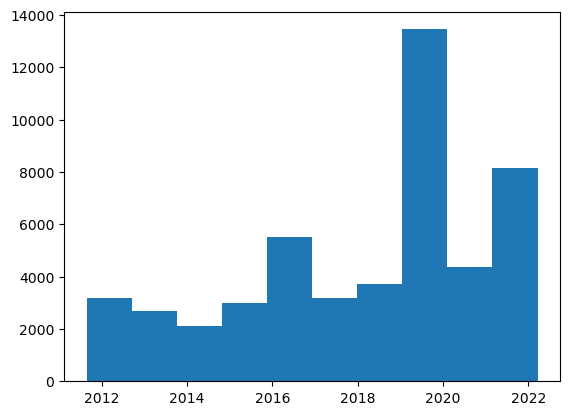

In [7]:
plt.hist(
    df.date[df.date.notnull()]
);

# MongoDB

In [8]:
import pandas as pd
import numpy as np
import pymongo

## Write to DB

In [9]:
client = pymongo.MongoClient('localhost', 27017)
db = client["news"]
data = db["data"]

In [10]:
df.date = pd.to_datetime(df.date)
df.date = df.date.astype(object).where(df.date.notnull(), np.nan)
df.reset_index(inplace=True)
df_dict = df.to_dict("records")

In [11]:
len(df_dict)

51446

In [12]:
df_dict[0]

{'index': 0,
 'source': 'BBC News',
 'date': nan,
 'title': 'Ad sales boost Time Warner profit',
 'category': 'business',
 'description': nan,
 'content': 'Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hope

In [13]:
data.insert_many(df_dict)